In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

In [46]:
X = (pd.read_csv("Linear_X_Train.csv")).values
y = (pd.read_csv("Linear_Y_Train.csv")).values

mean = X.mean()
std = X.std()
X = (X-mean)/std

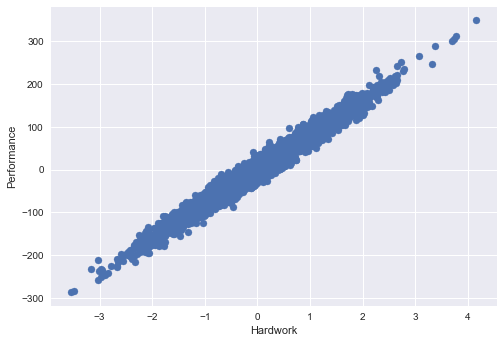

In [47]:
plt.scatter(X,y)
plt.ylabel("Performance")
plt.xlabel("Hardwork")
plt.show()

In [48]:
def hypothesis(x,theta):
    y_pred = theta[0]+theta[1]*x
    return y_pred

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_pred = hypothesis(X[i],theta)
        grad[0] += (y_pred - y[i])
        grad[1] += (y_pred - y[i]) * X[i]
    return grad/m

def gradient_descent(X,y,lr=0.1,max_steps=100):
    theta = np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        grad = gradient(X,y,theta)
        e = error(X,y,theta)
        error_list.append(e)
        theta[0]-=lr*grad[0]
        theta[1]-=lr*grad[1]
        
    return theta,error_list

def error(X,y,theta):
    m = X.shape[0]
    total_error=0
    for i in range(m):
        y_pred = hypothesis(X[i],theta)
        total_error+=(y[i]-y_pred)**2
    return total_error/m

In [49]:
theta,error_list = gradient_descent(X,y)

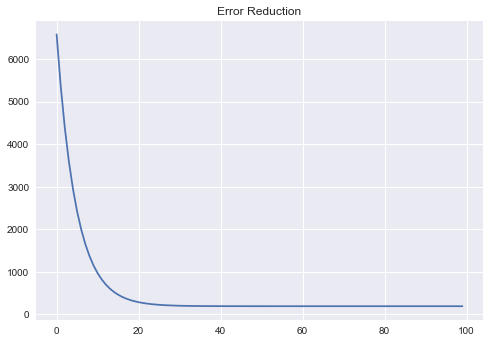

In [50]:
plt.plot(error_list)
plt.title("Error Reduction")
plt.show()

In [53]:
X_test = (pd.read_csv("Linear_X_Test.csv")).values

In [54]:
y_pred = hypothesis(X,theta)

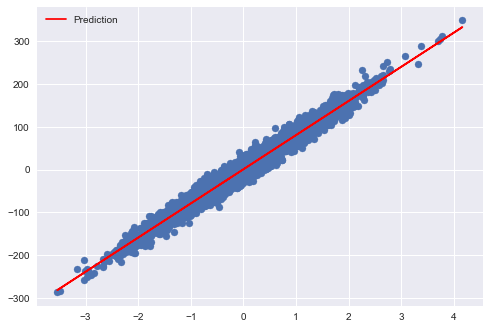

In [60]:
plt.scatter(X,y)
plt.plot(X,y_pred,c="red",label="Prediction")
plt.legend()

In [62]:
y_test_pred = hypothesis(X_test,theta)

In [64]:
df = pd.DataFrame(data=y_test_pred,columns=["y prediction"])

In [67]:
df.to_csv('prediction_y.csv',index=False)